In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

<h1>2. Logistic Regression </h1>



Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

<h2> 2.1 Odds Ratio (OR)</h2> 

The odds ratio is the probability to occur some event $A$ divided to the probability of not occur.
$$1) \; \; \; Odds(P) = \frac{P(A)}{1-P(A)} $$ 
where $P(A)\in [0,1]$ Let's see the graphic of the function
     

<ipython-input-2-66c2891d1aa0>:2: RuntimeWarning: divide by zero encountered in true_divide
  odds = p/(1-p)


Text(0, 0.5, 'P(A)')

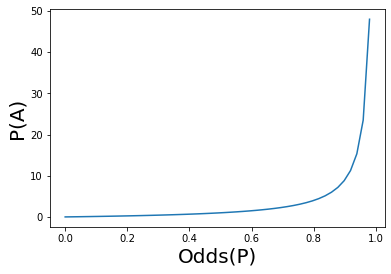

In [2]:
p = np.linspace(0,1)
odds = p/(1-p)
plt.plot(p,odds)
plt.xlabel("Odds(P)",size='20')
plt.ylabel("P(A)",size='20')

Important points about Odds ration : 
<ul>
      <li> The function is not symetric  </li>
    <li> $OR > 1$ indicates increased occurence of an event $OR\in [0:1)$ </li>
    <li> $OR < 1$  indicates decreased occurrence of an event and $OR\in (1:\infty]$ </li>
 </ul>  
We can transform the Odds function into another one that is more appropriate for interpretation, without losing the underlying information.The new function is called LogOdds or Logit function.

<h2>2.2 Logit function </h2>

Probability, odds ratios and log odds are all the same thing, just expressed in different ways.
</br></br>
</br>$$2)\; \; \; LogOdds  = \log(Odds)=\log{ \frac{P(A}{1- P(A)} }   $$

<ipython-input-3-691ba9180f1d>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(p,np.log(odds))


Text(0, 0.5, 'LogOdds')

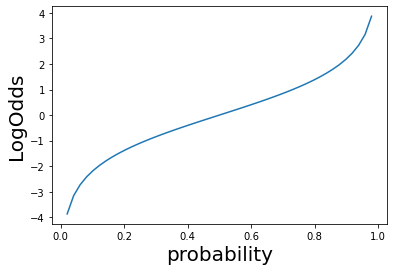

In [3]:
plt.plot(p,np.log(odds))
plt.xlabel("probability",size='20')
plt.ylabel("LogOdds",size='20')


The benefits are : 
<ul> 
    <li> The logit function unlike Odds is symetric </li>
    <li> The loggit varies between $[-\infty:\infty]$ </li>
    <li> The logit in logistic regression is a special case of a link function in a generalized linear model: it is the canonical link function for the Bernoulli distribution. </li>
 <li> The logit function is the negative of the derivative of the binary entropy function.
The logit is also central to the probabilistic Rasch model for measurement, which has applications in psychological and educational assessment, among other areas. </li>
<li>The inverse-logit function (i.e., the logistic function) is also sometimes referred to as the expit function.[7]
In plant disease epidemiology the logit is used to fit the data to a logistic model. With the Gompertz and Monomolecular models all three are known as Richards family models. </li>
<li> The log-odds function of probabilities is often used in state estimation algorithms[8] because of its numerical advantages in the case of small probabilities. Instead of multiplying very small floating point numbers, log-odds probabilities can just be summed up to calculate the (log-odds) joint probability </li> 
</ul>
The above properties able the Logit to be linked or described by polynomial functions including linear one.The logit function is the root of Logistic regression.

<h2>2.3 The origin of  Sigmoid function </h2>

The main point of logistic regression take up of assumption,mathematically defined as : </br> </br>
<br>
$$ 3) \; \; log^i(\frac{p^i}{1-p^i})=h^i(x{^i_m})\Theta $$) <br> where
$$ h_{\Theta}(x{^i}) =  \vartheta_0 + \vartheta_1 x^i_{1} + \vartheta_2 x_{2}^i+ ...\vartheta_n x_{m}^i  $$ <br>
and $i$ is number of obeservation,
$x^i_m $ feature values,
$\vartheta_0$ intercept,
$\vartheta_{m}$ (weight) slope coeff. for each explanority var. <br> 


The above hypotesis can also be represented by  
 $$H   = X\Theta$$ <br> <br>
 where $ \Theta =\begin{bmatrix}
\vartheta_0\\
\vdots \\
\vartheta_n \\
\end{bmatrix}$ $X = \begin{bmatrix} 
1 &x_1^1 & x_1^2 & x_1^n \\
\vdots & \ddots & \vdots & \vdots \\
1& x_m^1 & \dots & x_m^n \\
\end{bmatrix} $ and $H_{\Theta} = \begin{bmatrix}
 h^0_{\Theta}\\
\vdots \\
h^m_{\Theta} \\
\end{bmatrix}$
<br> <br>
we've append column $\begin{bmatrix}
1\\
\vdots \\
1\\
\end{bmatrix}$ to $X$ in order to be used in matrix multiplication directly.


  H =  X.dot(wights) <br>
  gradient_1 = self.X_prime.T.dot(self.__sigmoid__(self.X_prime, self.sample_weight))

Then eq 3) will look like : 
$$ 4) \; \; log^i(\frac{p^i}{1-p^i})=H^i $$


If we raise up both sides of eq 4) on a base $e$ : <br> <br>
$e^{log(\frac{p^i}{1-p^i})} = e^{H^i} \;$ <br> <br> $\Rightarrow  \frac{p^i}{1-p^i} = e^{H^i}$ $ 	\Rightarrow  p^i = e^{H_{\Theta}^i}(1-p^i) \;  $ 
<br> <br>
$\Rightarrow  p^i = e^{H^i}-p.e^{H^i}  \;  $ 
$\Rightarrow  p^i(1+e^{H^i}  ) = e^{H^i}  \; $ <br>
$\Rightarrow p^i= \frac {e^{H^i}} {1 +e^{H^i}}  $


we can tranform $p^i$ as 

$\Rightarrow p^i= \frac {e^{H^i}e^{-H^i}} {(1 +e^{H^i})e^{-H^i}}  $
<br> <br>
$\Rightarrow p^i= \frac{1}{1 +e^{-H^i} }   $

The function $$5) \; \; \; \sigma^i = p^i=   \frac{1}{1 +e^{-H^i}  }$$ or 
  $$\sigma =   \frac{1}{1 +e^{-H}  } $$
is called sigmoid

<h2> 2.4 Properties and Identities Of Sigmoid Function </h2>

The sigmoid function has verry intersting proporties.
Let see for example :  $\sigma =\frac{1}{1 +e^{-(2.x + 4)}  }$

In [36]:
def sigmoid(x,a,b):
    z = [i*a +b for i in x]
    result = [1/(1+np.exp(-i)) for i in z ]
    return result


def sigmoid2(x,a,b):
    z = np.array([i*a +b for i in x])
    return 1/(1+np.exp(-z))
    #result = [1/(1+np.exp(-i)) for i in z ]
    #return result

Text(0, 0.5, 'Sigmoid')

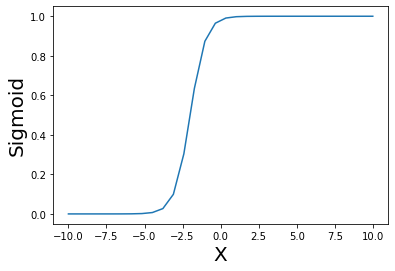

In [37]:
x = np.linspace(-10,10,30)
y =  sigmoid2(x,2,4)
plt.plot(x,y)
plt.xlabel("X",size='20')
plt.ylabel("Sigmoid",size='20')

Text(0, 0.5, 'Sigmoid')

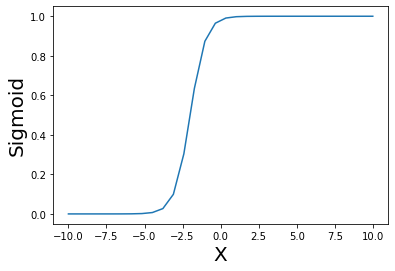

In [38]:
x = np.linspace(-10,10,30)
y =  sigmoid(x,2,4)
plt.plot(x,y)
plt.xlabel("X",size='20')
plt.ylabel("Sigmoid",size='20')

The graph of sigmoid function is an S-shaped curve as above line in the graph.The main proporties : 
<ul>
    <li> It is difined in domain  $x\in[-\infty:\infty]$ </li>
    <li>The function is differentiable everywhere in its domain.</li>
    <li> The range of $\sigma$ =  $x\in(0:1)$ </li>
    <li> $\sigma(0)= 0.5 $ </li>
     <li>  The function is monotonically increasing. </li>
    <li>  The function is continuous everywhere. </li>
    <li> Numerically, it is enough to compute this function’s value over a small range of numbers, e.g., [-10, +10]. For values less than -10, the function’s value is almost zero. For values greater than 10, the function’s values are almost one.</li> 
    </ul>  <br>
By sigmoid function we can model binary output,  $\sigma(X) < 0.5 $ then the result is $0$ or 'False' otherwise $1$ or 'True'. <br>
Let's see the sigmoid with different weights $\vartheta_{0}$ and $ \vartheta_{1} $

In [6]:
def cartesian(start,end,step):
    x = y = np.linspace(start,end,step)
    result = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
            
    return result  
def plot(num):
    """
    
    """
    
    size = np.sqrt(num)  
    a = cartesian(1,100,num)
  
    x = np.linspace(-10,10,30)
    if not size.is_integer():
        raise ValueError("num must has precise  root of integer type ")
    size = int(size)
    fig, axs = plt.subplots(size, size,figsize=(25,25))    
    for i in range(size):
        for j in range(size):
            t_1= 2**i/10 + i
            t_2 = 3**j - j
            axs[i, j].set_title(r'$ \theta_0 = {},\theta_1 = {} $'.format( t_1, t_2),size=20) 
            y=sigmoid(x, t_1, t_2)
            axs[i, j].plot(x,y)

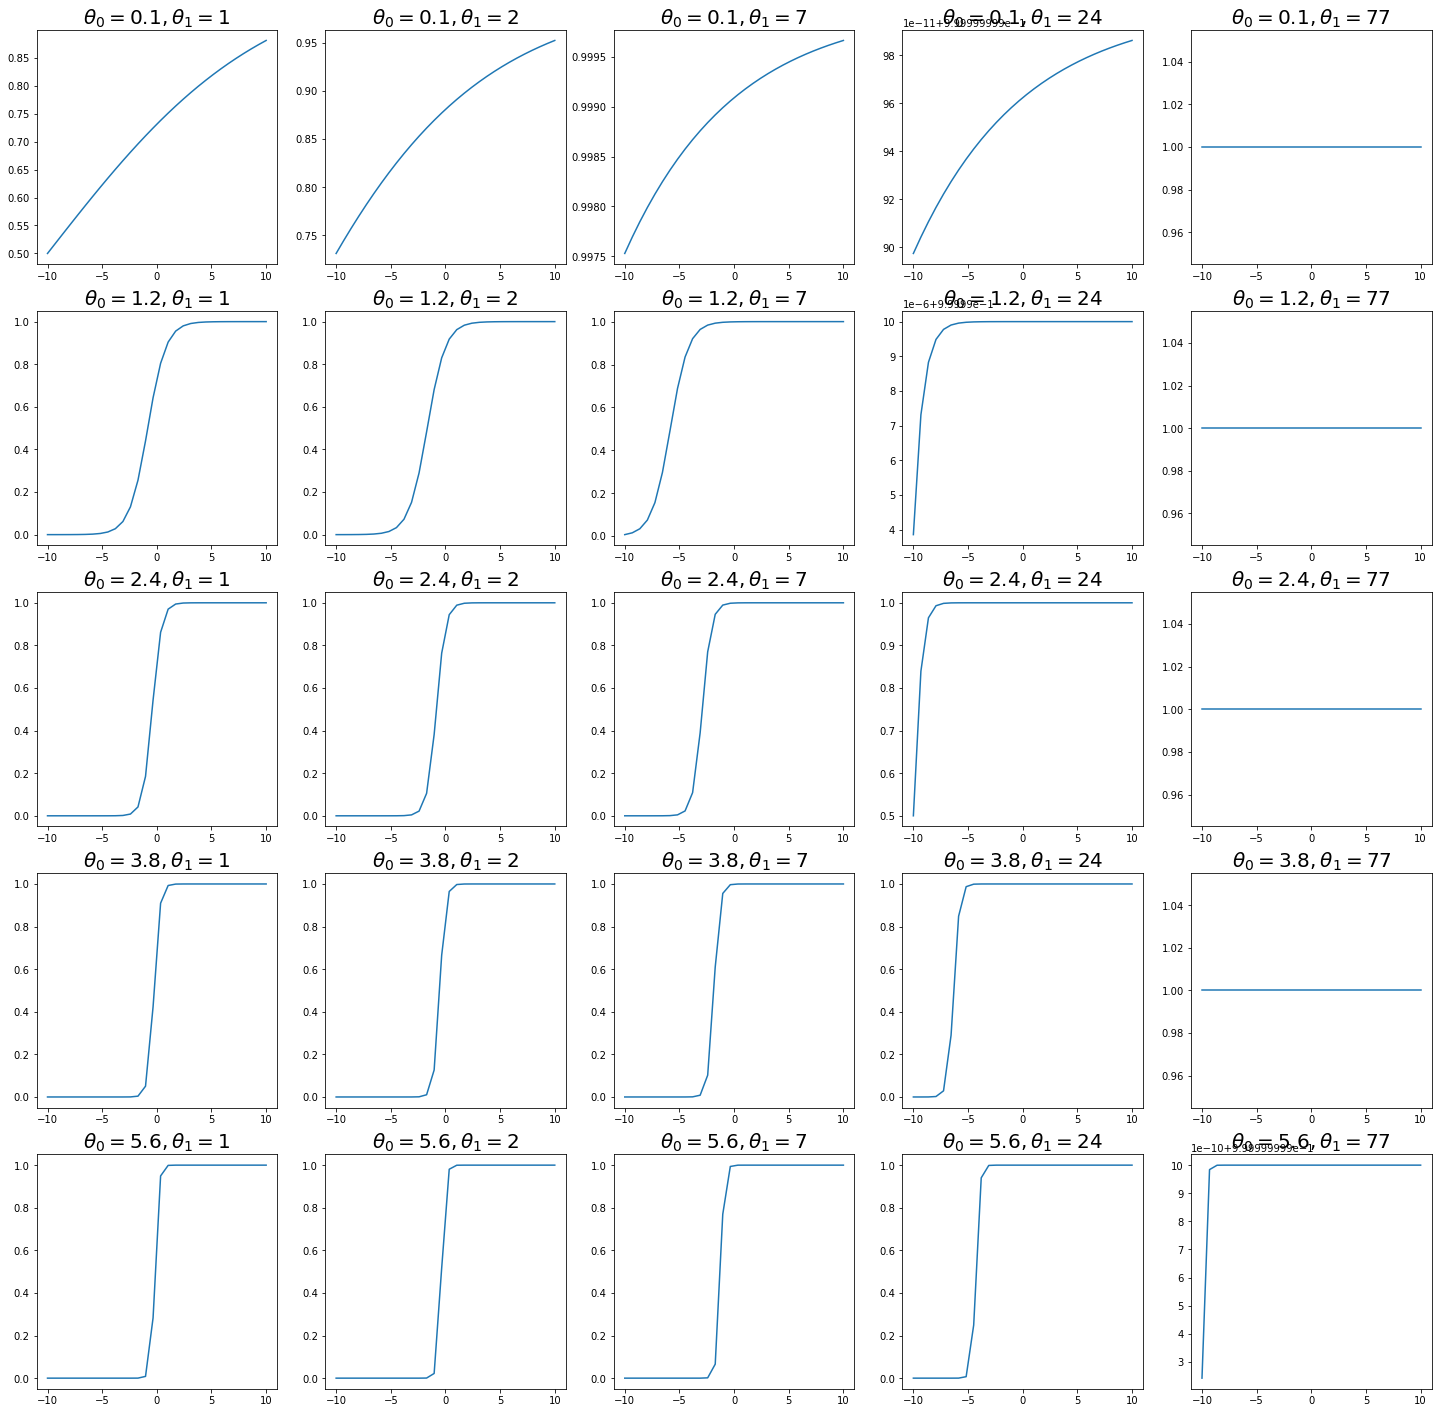

In [7]:
plot(25)

<h2>2.5 Optimization of Sigmoid function using Logistic Loss or Cross-entropy loss</h2>

Let's generate our data.

In [8]:
# generate labeled  from already defined y data given the sigmoid with args z = 5*x-4 
# with some random getting of data between [0.3,0,7]
def generated_label(i):
        if i < 0.3 :
            return 0
        elif i > 0.7 :
            return 1
        else :
            return np.random.randint(0,2)

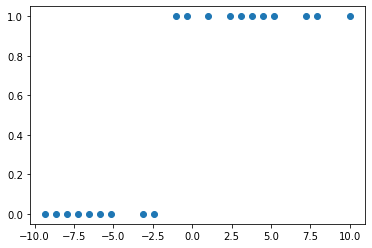

In [9]:
y_label = np.array([generated_label(i) for i in np.linespace])   
X_train, X_test, y_train, y_test = train_test_split(x, y_label, test_size=0.33, random_state=42)
plt.scatter(X_train,y_train)

Out pupose is to find the sigmoid that the best fit the above points. <br> <br>
We've saw that  the sigmoid transforms every variable belongs  $𝑥∈[−∞,∞]$  into variable belongs to interval  $\sigma∈[0,1]$,we will consider every  $\sigma \in (0,0.5)$ as $0$ and  $\sigma > 0.5 $ as $1$  <br> <br>
The logistic regression deals with finding the best parameters $\theta m = \theta_0,\theta_1,..,\theta_m $ according to given data using some appropriative Loss function.In contex of above data we have to find the best $\theta_0,\theta_1$.Unlike Linear regression the least-squared can not to be applied,we have to use another more appropriateve loss function for optimization.The loss function of logistic regression is doing this exactly which is called Logistic Loss. 

LogisticLoss funtion for sigmoid is difined : 
$$ 6) \; \;  LogLoss(\sigma(x,\Theta),y) = \Bigg( \begin{matrix}  -log(\sigma(x,\Theta)) && if\; y=1 \\log( 1 - \sigma(x,\Theta)) && if\; y=0\end{matrix}\Bigg)  $$ 

In [10]:
def error_0(x):
       return  -np.log(1-x)
    
def error_1(x):
      return -np.log(x)

<ipython-input-10-b62c9a74d392>:2: RuntimeWarning: divide by zero encountered in log
  return  -np.log(1-x)
No handles with labels found to put in legend.


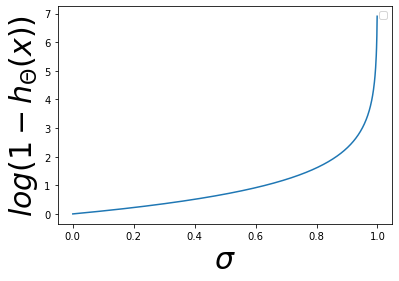

<ipython-input-10-b62c9a74d392>:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(x)
No handles with labels found to put in legend.


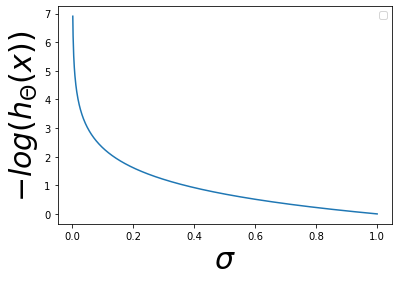

In [11]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values))
plt.xlabel(r'$\sigma$',size=30)
plt.ylabel(r'$log(1 - h_{\Theta}(x))$',size=30)
plt.legend()
plt.show()
plt.plot(sigmoid_values, error_1(sigmoid_values))
plt.ylabel(r'$-log(h_{\Theta}(x))$',size=30)
plt.xlabel(r'$\sigma$',size=30)
plt.legend()
plt.show()

The LoggLoss function also called Cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1.Cross-entropy loss increases as the predicted probability diverge from the actual label.So predicting a probability of 0.01 when the actual observation label is 1 would be bad and result in a high loss value showing in graph 2 above for  log(1−ℎΘ(𝑥)) .A perfect model would have a log loss of 0.As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predictions that are confident and wrong! Cross-entropy and log loss are slightly different depending on context, but in machine learning when calculating error rates between 0 and 1 they resolve to the same thing.

<ipython-input-10-b62c9a74d392>:2: RuntimeWarning: divide by zero encountered in log
  return  -np.log(1-x)
<ipython-input-10-b62c9a74d392>:5: RuntimeWarning: divide by zero encountered in log
  return -np.log(x)


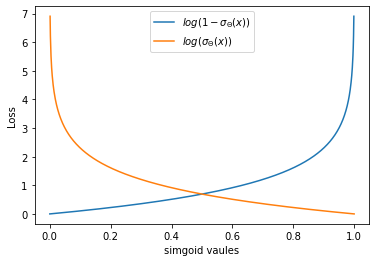

In [12]:
sigmoid_values = np.linspace(0, 1, 1000)
plt.plot(sigmoid_values, error_0(sigmoid_values), label = r'$log(1 - \sigma_{\Theta}(x))$')
plt.xlabel('simgoid vaules')
plt.ylabel('cost')
plt.legend()
plt.plot(sigmoid_values, error_1(sigmoid_values), label = r'$log(\sigma_{\Theta}(x))$')
plt.xlabel('simgoid vaules')
plt.ylabel('Loss')
plt.legend()
plt.show()

The eq. 6) can be rewritten in more compact form.In probability theory cross-entropy is known as  Log-Likelihood. 
  <br>  Let us regard  the value of $h_{\Theta}(x^i)$ just as probability: <br>

  $$ \begin{matrix}
P(y^i=1|x^i,\Theta) = \sigma(x^i,\Theta)  \\
P(y^i=0|x^i,\Theta) = 1-\sigma(x^i,\Theta)
\end{matrix}\;\; <=>\; P(y^i|x;\Theta)=\sigma(\Theta,x)^{y^i}(1-\sigma(\Theta,x^i))^{1-y^i}$$ 
<br>

Likehood is: <br> <br>
    $L(\Theta) = p(Y|X;\Theta) = $ <br> <br>
    $= \prod_{i=1}^{m}p(y^{(i)}|x^{(i)};\Theta) $ <br> <br>
    $= \prod_{i=1}^{m}h_{\Theta}(x^{(i)})^{y^{i}}(1-\sigma_{\Theta}(x))^{1-y^{(i)}}$   <br> <br> 


And the log likehood:
      $$ 6) \; \; LogLoss(L(\Theta))=\sum_i^m y^i.log(\sigma^i(\Theta,x_i)) + (y^i-1)log(1 - \sigma^i(\Theta,x_i))$$
   The above euation is called likelihood or cross entropy.<br>
   This is will be our lost function 
 $$ (7) \; \;J(\Theta) = \sum_i^m Cost(\sigma^i(\Theta,x_i),y^i)=-\frac{1}{m}\big(\sum_i^m y^i.log(\sigma^i(\Theta,x_i)) + (y^i-1)log(1 -\sigma^i(\Theta,x_i))\big)$$

<ipython-input-13-de5ae9805159>:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
<ipython-input-13-de5ae9805159>:3: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)


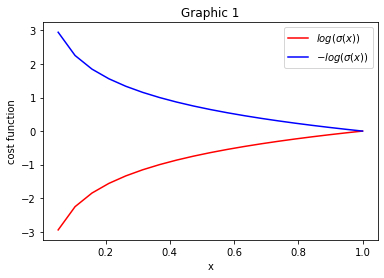

<ipython-input-13-de5ae9805159>:13: RuntimeWarning: divide by zero encountered in log
  y = np.log(1-x)
<ipython-input-13-de5ae9805159>:14: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(1-x)


Text(0.5, 1.0, 'Graphic 2')

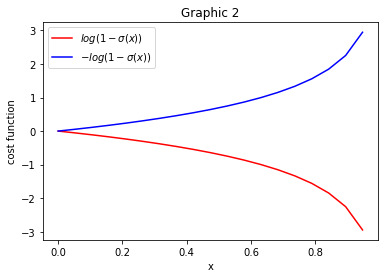

In [13]:
x = np.linspace(0,1,20)
y = np.log(x)
y1 = -np.log(x) 

plt.plot(x,y,color='red',label=r'$log(\sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(\sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.title('Graphic 1')
plt.legend()
plt.show()

y = np.log(1-x)
y1 = -np.log(1-x) 

plt.plot(x,y,color='red',label=r'$log(1- \sigma(x))$')
plt.plot(x,y1,color='blue',label=r'$-log(1- \sigma(x))$')
plt.xlabel("x")
plt.ylabel("cost function")
plt.legend()
plt.title('Graphic 2')

 $$ (8) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 0 $$ 
  $$ (9) \; \; \; x \to 1 \; then \; -log(\sigma(x)) \to 0 \;    $$
  <br> <br>
   $$(10) \; \; \;x \to 0 \; then \; log(\sigma(x)) \to \infty $$
  $$ (11) \; \; \;x \to 0 \; then \;  -log(\sigma(x)) \to -\infty $$ </br> <br>
From eq. (8) we can conclude that when we have to fit the estimators($\theta_i$) values to label(target) ones that take value either 1 or 0 then eq. $-log(\sigma(x))$ must be minimized.<br> 
        In such a way, the min error(min loss) which refers to min-entropy will be achieved in case when the target value is equal to 1. <br>
        if we use eq.(9) we have to  maximize a $log(\sigma(x))$ this will give the min-entropy and min error as well but $log(\sigma(x))$ has not a closed-form, therefore the finding the extremums is a difficult task.When the target value is 0 the both functions $log(1−σ(x)),−log(1−σ(x))$ are useless, because they tend to infinity  $−log(1−σ(x)),−log(1−σ(x))→+−∞$ and  $error→+−∞$  and entropy do the same , since they also have a closed-form

$$ (12) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to -\infty $$ 
  $$ (13) \; \; \; x \to 1 \; then \; -log(1-\sigma(x)) \to \infty;    $$ <br> <br><br>
    $$(14) \; \; \;x \to 0 \; then \; \;log(1-\sigma(x)) \to 0 $$
  $$ (15) \; \; \;x \to 0 \; then \; \; -log(1-\sigma(x)) \to 0 $$ </br>
<br>
The above thoughts can be taken into account for eq. (12)(13)(14)(15) as well, but with the opposite logic, when the target value is equal to 0 then  the best choice is $-log(1-\sigma(x))$ because it has closed-form tends to 0 not to infinity. <br> <br>
   
 We've assumed that why the minimization of eq (2) will give the min error equivalented to min-entropy.

In order to minimize  cross-entopy loss $\; \;J(\Theta) = \sum_i^m Cost(\sigma(\Theta,x_i),y_i)=-\frac{1}{m}\big(\sum_i^my_i.log(\sigma(\Theta,x_i)) + (y_i-1)log(1 - \sigma(\Theta,x_i))\big)$ we will used well known $Gradient-Descent$.

  $$16) \; \;  \theta_m = \theta_m - \nabla_{\Theta_m}L(\Theta)*h$$

$\; \; \dot{J}(\Theta)_{\theta_k}=\frac{\partial J(\Theta)}{\partial \theta_k} =  -\frac{1}{m}\sum_i^m\big(y^i\frac{\partial log(\sigma^i(\Theta,x^i_m))}{\partial \theta_k}+  (1-y^i)\frac{\partial log(\sigma^i(\Theta,x^i_m)-1)}{\partial \theta_k}\big) $

$= -\frac{1}{m}\sum_i^m\big(y^i \frac{dlog(\sigma^i(\Theta,x^i_m))}{d\sigma^i(\Theta,x^i_m)}\frac{\partial \sigma^i(\Theta,x^i_m)}{\partial \theta_k}+  (y^i-1) \frac{dlog(1- \sigma^i(\Theta,x^i_m))}{d\sigma^i(\Theta,x^i_m)}\frac{\partial \sigma^i(\Theta,x^i_m)}{\partial \theta_k}\big)   $

$= -\frac{1}{m}\sum_i^m\big(y^i \frac{1}{\sigma^i(\Theta,x^i_m)}\frac{\partial \sigma(\Theta,x^i_m)}{\partial \theta_k}+  (y^i-1) \frac{1 }{1- \sigma^i(\Theta,x^i_m)}\frac{-\partial \sigma^i(\Theta,x^i_m)}{\partial \theta_k}\big)   $

$$18) \; \;  \frac{\partial J(\Theta)}{\partial \theta_k} =   -\frac{1}{m}\sum_i^m\big(y^i \frac{1}{\sigma^i(\Theta,x^i_m)}\frac{\partial \sigma(\Theta,x^i_m)}{\partial \theta_k}+  (y^i-1) \frac{1 }{1- \sigma^i(\Theta,x^i_m)}\frac{-\partial \sigma^i(\Theta,x^i_m)}{\partial \theta_k}\big)  $$

let's calculate $\frac{\partial \sigma^i(\Theta,x^i_m)}{\partial \theta_k} = \frac{d(\frac{1}{1 +e^{-H^i}})}{dH^i}.\frac{\partial H^i}{\partial \theta_k} =\frac{e^{-H^i}}{(1+e^{-H^i})^2}\frac{\partial H^i}{\partial \theta_k} $


$=\frac{1}{1+e^{- H^i}}(1 -\frac{1}{1+e^{- H^i}} )\frac{\partial H^i}{\partial \theta_k} = \sigma^i(\Theta,x^i_m) (1 - \sigma^i(\Theta,x^i_m)\frac{\partial H^i}{\partial \theta_k} $

$$ 19) \; \; \frac{\partial \sigma^i(\Theta,x^i_m)}{\partial \theta_k} =\sigma^i(\Theta,x^i_m) (1 - \sigma^i(\Theta,x^i_m)\frac{\partial H^i}{\partial \theta_k} $$

Applying eq) 19) into eq 18) we will get : 

$\; \;  \frac{\partial J(\Theta)}{\partial \theta_k} =  -\frac{1}{m}\sum_i^m\big(y^i \frac{1}{\sigma^i(\Theta,x^i_m)}\sigma^i(\Theta,x^i_m) (1 - \sigma^i(\Theta,x^i_m)\frac{\partial H^i}{\partial \theta_k}+  (y^i-1) \frac{1 }{1- \sigma^i(\Theta,x^i_m)}.-\sigma^i(\Theta,x^i_m) (1 - \sigma^i(\Theta,x^i_m)\frac{\partial H^i}{\partial \theta_k}  $ 

$= -\frac{1}{m}\sum_i^m\big(y^i\frac{\partial H^i}{\partial \theta_k} -y^i \sigma^i(\Theta,x^i_m))\frac{\partial H^i}{\partial \theta_k} +y^i\sigma^i(\Theta,x^i_m))\frac{\partial H^i}{\partial \theta_k}- \sigma^i(\Theta,x^i_m)\frac{\partial H^i}{\partial \theta_k}\big)$ 

$= -\frac{1}{m}\sum_i^m\big(y^i\frac{\partial H^i}{\partial \theta_k}- \sigma^i(\Theta,x^i_m)\frac{\partial H^i}{\partial \theta_k}\big)= -\frac{1}{m}\sum_i^m\big(y^i - \sigma^i(\Theta,x^i_m\big)  \frac{\partial H^i}{\partial \theta_k}$ 

$$20 )\; \;  \frac{\partial J(\Theta)}{\partial \theta_k} =-\frac{1}{m}\sum_i^m\big(y^i - \sigma^i(\Theta,x^i_m)\big)  \frac{\partial H^i}{\partial \theta_k} $$

$\frac{\partial H^i}{\partial \theta_k} = \frac{\partial \theta_mx^i_m}{\partial \theta_k} =  \delta_{mk}x^i_m = x^i_m$ applying this result above we will achieve 

$\frac{\partial J(\Theta)}{\partial \theta_k} = - \frac{1}{m}\sum_i^m\big(y^i - \sigma^i(\Theta,x^i_m)\big)x^i_m$

$=\frac{1}{m}\sum_i^m \sigma^i(\Theta,x^i_m)x^i_m -\frac{1}{m}\sum_i^m y^i x^i_m $

In [56]:
#numpy 
gradient_1 = self.__sigmoid__(self.X_prime, self.sample_weight).T.dot(self.X_prime).T
gradient_1 = self.X_prime.T.dot(self.__sigmoid__(self.X_prime, self.sample_weight))
gradient_2 =  self.Y_prime.T.dot(self.X_prime).T
gradient_2 = self.Y_prime.T.dot(self.X_prime)
gradient_2=  self.X_prime.T.dot( self.Y_prime)
gradient = m * (gradient_1-gradient_2)
self.sample_weight = self.sample_weight  - gradient*C

NameError: name 'self' is not defined

In matrix form in order to be more less use in <NUMPY> we rewrite  : 
$\frac{\partial J(\Theta)}{\partial \theta_k} = \frac{1}{m} X^T(Y - \sigma)$

<h2> Implementation of BinaryLogisticRegression from scratch (Python) 
</h2>

In [57]:
class BinaryLogisticRegression:

    def __init__(self):
        self.sample_weight = None
        self.X_prime = None
        self.Y_prime = None

    def fit(self, X, y, C=0.05, I=2500):
        self.X_prime, self.Y_prime = self.__validate(X, y)
        self.X_prime, self.sample_weight = self.__prepare(self.X_prime, self.Y_prime)
        m = 1 / X.shape[0]

        for i in range(I):
            gradient = m * self.X_prime.T.dot(self.__sigmoid__(self.X_prime, self.sample_weight) - self.Y_prime)
            self.sample_weight = self.sample_weight - gradient * C

    def score(self, X, y):
        X, y = self.__validate(X, y)
        y_p = self.predict(X)
        res = y - y_p
        correct = res[np.nonzero(res == 0)].shape[0]
        size = y_p.shape[0]
        return correct / size

    def predict(self, X):
        X, e = self.__validate(X, self.Y_prime)
        X, e = self.__prepare(X, self.Y_prime)
        return np.round(self.__sigmoid__(X, self.sample_weight))

    def __sigmoid__(self, X, wights):
        H = X.dot(wights)
        return 1 / (1 + np.exp(-H))

    def __validate(self, X, y):
        X = np.array(X)
        # y = np.array(y)
        y = np.array(y).reshape(y.shape[0], 1)
        return X, y
        if False:
            raise ValueError("Maximum number of iteration must be positive;"" got (max_iter=%r)" % self.max_iter)

    def __prepare(self, X, y):
        weights = None
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        weights = np.ones((X.shape[1], 1))
        return X, weights

In [44]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')
data.columns = ['variance','skewness','curtosis','entropy','Class']    

In [45]:
data


,variance,skewness,curtosis,entropy,Class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [58]:
x = data.iloc[:, : -1]
y = data.iloc[:, -1]

scaler = StandardScaler()
x = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [59]:
r = BinaryLogisticRegression()
r.fit(X_train, y_train)
print(r.sample_weight)
print(r.score(X_test, y_test))

[[-0.79795648]
 [-3.72638035]
 [-3.0569379 ]
 [-2.96198232]
 [ 0.36577552]]
0.977924944812362


<h2> References </h2> 
<ul>
    <li><a href='https://en.wikipedia.org/wiki/Logit'>Loggit- wikepedia </a> </li>
</ul>        

In [54]:
np.round(np.array([0.1,0.51,0.6]))

array([0., 1., 1.])